# 파이썬 matplotlib 라이브러리를 활용하여 동적인 막대그래프를 그려보자

- 데이터 : 대한민국 연령대별 인구수(통계청 자료)  
- 출처 : https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41  
- matplotlib animation 라이브러리 : https://matplotlib.org/2.0.2/examples/animation/simple_anim.html

In [0]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation  # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.animation.FuncAnimation.html

from IPython.display import HTML

from io import StringIO, BytesIO   # 데이터 입력 방법 : https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table

### 대한민국 연령대별 인구수  
- 기간 : 1925년 ~ 2010년(4~5년 단위)
- 연령대 구분 : 5->10대이하, 10->10대, 20->20대, ... , 60->60대, 70->70대이상  
- 단위 : 명
- 데이터 출처 : 국가통계포털
http://kosis.kr/statisticsList/statisticsListIndex.do?menuId=M_01_01&vwcd=MT_ZTITLE&parmTabId=M_01_01#SelectStatsBoxDiv

In [0]:
data = """
date	5	10	20	30	40	50	60	70
1925	5393679	4034290	2942825	2399244	1767238	1262067	869579	351108
1930	5939343	4272418	3083519	2581464	1944545	1345397	851486	419936
1935	6558052	4633536	3510799	2594695	2104157	1463529	884907	458427
1940	7134896	4984927	3539692	2662128	2218176	1598272	944430	464944
1944	7841149	5359172	3540902	2924223	2224906	1646609	1033522	549691
1955	6244036	5015932	3193527	2558027	2001943	1294895	839710	354316
1960	7331115	5205409	4192635	2973071	2221231	1549114	971303	530274
1966	9093793	6298173	4543017	3512569	2463361	1736355	988337	523935
1970	8848085	7481482	4727463	4047479	2746531	1879576	1099973	604663
1975	8681058	8674242	5630576	4413382	3198973	2136584	1280379	663772
1980	8215638	8679866	7135810	4742582	3913464	2451278	1442340	825831
1985	7618905	8792249	8315498	5696419	4276720	2963016	1729693	1026732
1990	7142298	8440913	8729809	7408924	4716159	3632871	2057373	1261925
1995	6523524	7575471	8442291	8364103	5535396	3977229	2539061	1596226
2000	6574314	6756026	7945164	8280181	6948359	4318722	3164971	1995684
2005	5551237	6535414	7333970	8209067	8023940	5133735	3568920	2685151
2010	4613747	6611640	6594369	7794495	8204781	6564826	3994404	3612499
"""

In [18]:
# 데이터프레임 만들기
df = pd.read_csv(StringIO(data), sep='\t')
df = df.melt(id_vars=['date'])
df.tail()

,date,variable,value
131,1990,70,1261925
132,1995,70,1596226
133,2000,70,1995684
134,2005,70,2685151
135,2010,70,3612499


In [0]:
# 그룹 컬럼 추가
dic = {'5':'Young',	
       '10':'Young',	
       '20':'Young',	
       '30':'Middle',	
       '40':'Middle',
       '50':'Middle',
       '60':'Old',
       '70':'Old'}
df['group'] = df['variable'].replace(dic)

# 소스코드 예제와 데이터 피처명, 피처순서를 똑같이 맞추자
cols_order = ['variable', 'group', 'date', 'value']
cols_new = ['name', 'group', 'year', 'value']
df = df[cols_order]
df.columns = cols_new

In [0]:
# 그룹 컬러 지정
colors = dict(zip(
    ['Young', 'Middle', 'Old'],
    ['#aafbff', '#90d595', '#f7bb5f']
))
group_lk = df.set_index('name')['group'].to_dict()

""" 좀 더 많은 색깔 목록 참조
colors = dict(zip(
    ['India', 'Europe', 'Asia', 'Latin America',
     'Middle East', 'North America', 'Africa'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
))
"""

In [0]:
# 차트 생성 함수
def draw_barchart(year, 
                  unit = 'Population', 
                  title = 'Number of South Koreans by age group from 1925 to 2010'):
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, unit, transform=ax.transAxes, size=12, color='#777777')       #### 단위 ####
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, title,                                                        #### 제목 ####
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

#### 한 장 그려보자

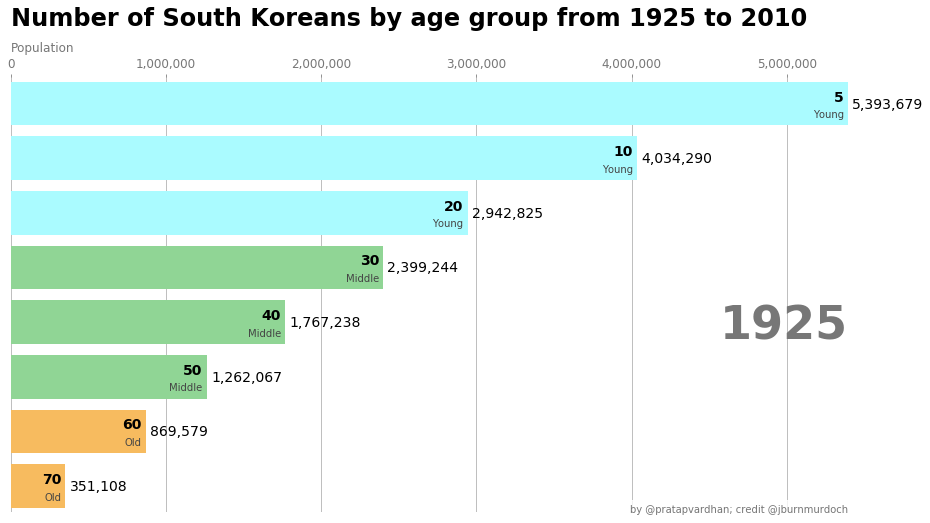

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(1925)

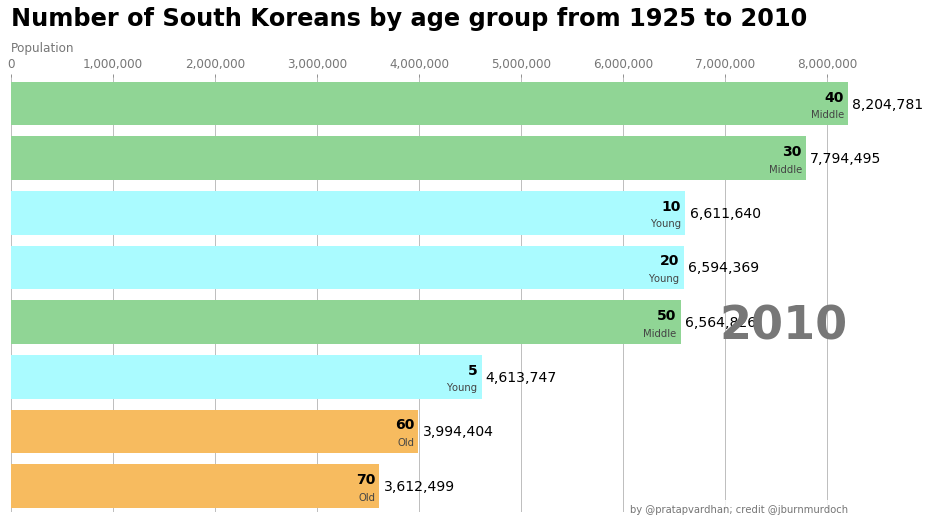

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(2010)

#### 애니메이션 차트

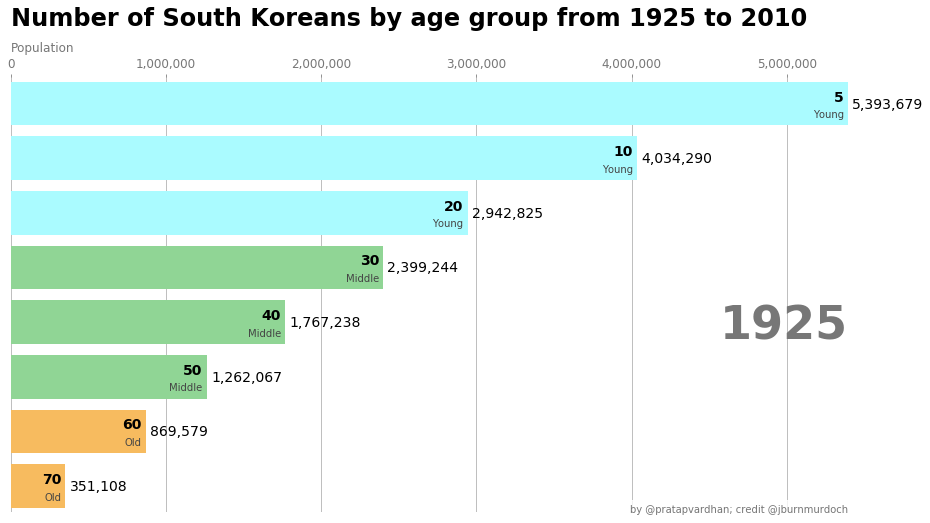

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, interval=750,  
                                   frames=df['year'].unique())
HTML(animator.to_jshtml()) 

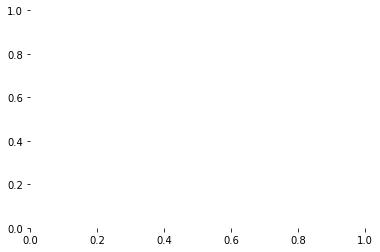

In [30]:
# 저장하기
# or use animator.to_html5_video() or animator.save()
animator.save(filename="KoreanByAge.mp4")

In [32]:
!ls -lh *.mp4

-rw-r--r-- 1 root root 28K Sep 27 05:41 KoreanByAge.mp4


#### 보너스 차트!

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


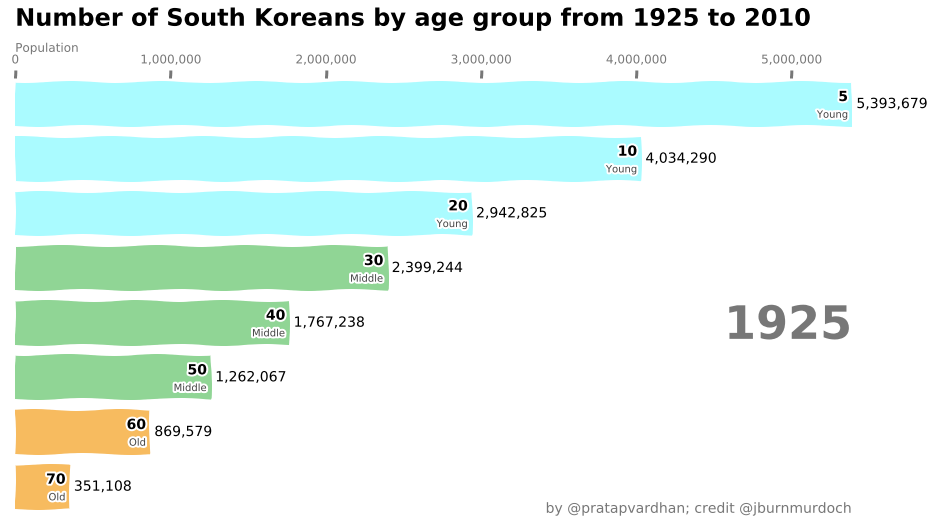

In [28]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(15, 8))
    draw_barchart(1925)

# 마지막 정리 

애니메이션 차트에 딱 맞는 ***데이터*** 찾는게 가장 힘들다(시계열+드라마틱한 변화)  
파이썬 코드는 거들 뿐